# Market Basket Analysis

The initial dataset was collected from Groceries dataset. Then data was modified and fragmented into 2 datasets for ease of MBA implementation. Here the "groceries data.csv" contains groceries transaction data from which you can do EDA and pre-process the data to feed it in the apriori algorithm.

Dataset link = https://www.kaggle.com/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba?select=Groceries+data.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [2]:
# Load the dataset
gd = pd.read_csv('Groceries_data.csv')
gd.head(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [3]:
#Dropping Date column
gd = gd.drop('Date', 1)
#Creating a new variable for Apriori and Frequent Patterns analysis
df = gd
# Display the records
df.head()

,Member_number,itemDescription,year,month,day,day_of_week
0,1808,tropical fruit,2015,7,21,1
1,2552,whole milk,2015,5,1,4
2,2300,pip fruit,2015,9,19,5
3,1187,other vegetables,2015,12,12,5
4,3037,whole milk,2015,1,2,4


In [4]:
#Reviewing type and quantity of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
 2   year             38765 non-null  int64 
 3   month            38765 non-null  int64 
 4   day              38765 non-null  int64 
 5   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ MB


In [5]:
#Checking for nules objectives in the Dataset
df.isnull().sum()

Member_number      0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [6]:
#Analyzing quantity of unique values in target column
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [7]:
#Exhibing dataframe shape
df.shape

(38765, 6)

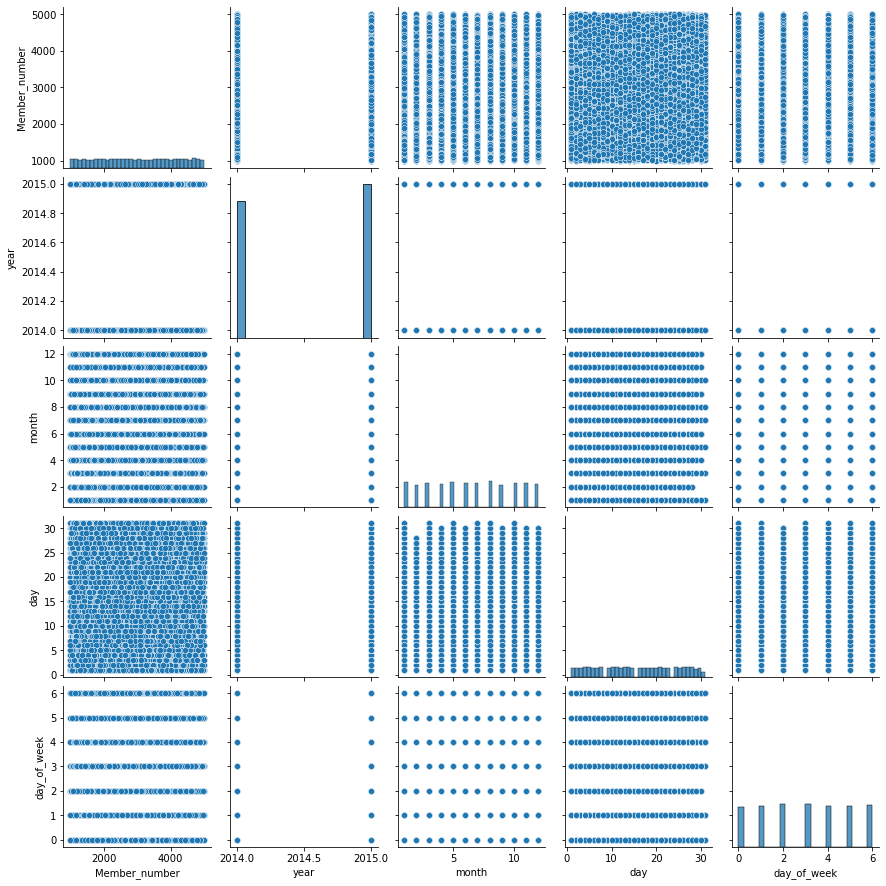

In [8]:
#Pairplot graphical analysis, reviewing correlation between variables
sns.color_palette("tab10")
sns.pairplot(df)

Text(0.5, 1.0, 'Most products chosen per Day and Month')

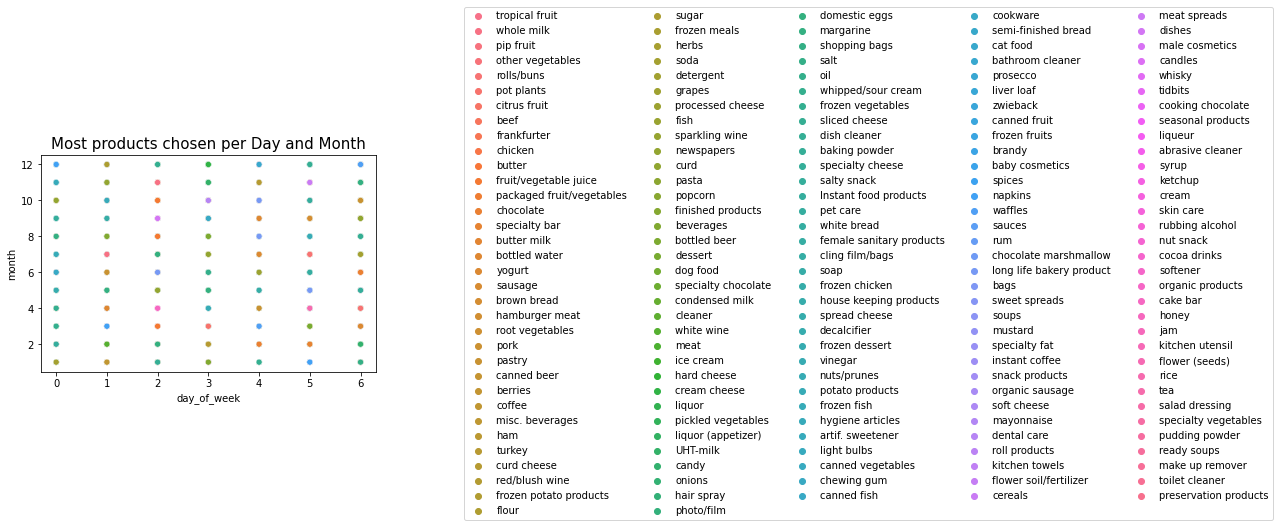

In [24]:
#Scatterplotting dataframe to get correlation between numerical and categorical variables.
sns.color_palette("tab10")
s= sns.scatterplot(y="month", x="day_of_week", data=df, hue='itemDescription')
s.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=5)
plt.title('Most products chosen per Day and Month', fontsize = 15, color='black')

In [33]:
df['day'].value_counts().mean()

1250.483870967742

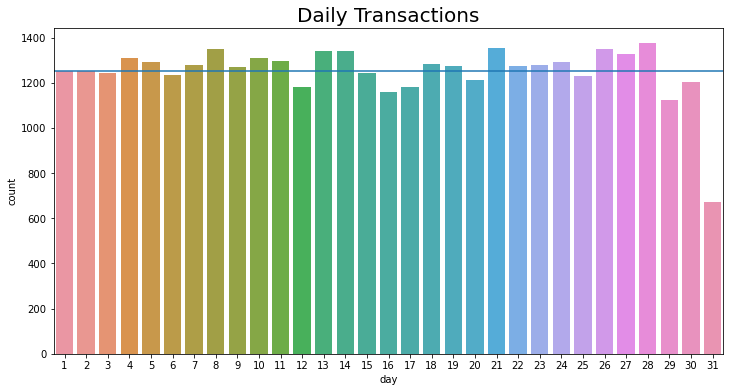

In [34]:
#Countplotting summatory of quantity of transaction montly
ax = plt.subplots(figsize = (12,6))
ax = sns.countplot(x="day", data=df)
plt.title('Daily Transactions', fontsize = 20, color='black')
ax.axhline(1250.48)

In [11]:
#Tnransforming column Member_number to string
df['Member_number'] = df['Member_number'].astype('str')

In [12]:
#grouping dataset to form a list of products bought by same customer on same day of the week
basket = df.groupby(['Member_number','day_of_week'])['itemDescription'].apply(lambda x: list(x))

In [13]:
basket

Member_number  day_of_week
1000           1                              [whole milk, pastry, salty snack]
               2              [soda, sausage, pickled vegetables, hygiene ar...
               4                                 [canned beer, misc. beverages]
               6              [sausage, whole milk, semi-finished bread, yog...
1001           1              [frankfurter, beef, soda, white bread, whipped...
                                                    ...                        
4999           3                              [semi-finished bread, newspapers]
               5              [bottled water, butter milk, tropical fruit, b...
5000           2                                [fruit/vegetable juice, onions]
               4                   [soda, root vegetables, semi-finished bread]
               6                               [bottled beer, other vegetables]
Name: itemDescription, Length: 11542, dtype: object

In [14]:
basket.shape

(11542,)

In [15]:
#Creating a list to be used in Apriori Machine Learning Model
groceries = basket.values.tolist()
groceries[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['soda', 'sausage', 'pickled vegetables', 'hygiene articles'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['frankfurter', 'beef', 'soda', 'white bread', 'whipped/sour cream'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['frankfurter', 'curd'],
 ['whole milk', 'soda'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk']]

In [16]:
#applying apriori
from apyori import apriori
rules = apriori(groceries, min_support=0.00030,min_confidence = 0.8,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'whole milk', 'processed cheese', 'butter'}), support=0.0005198405822214521, ordered_statistics=[OrderedStatistic(items_base=frozenset({'processed cheese', 'butter'}), items_add=frozenset({'whole milk'}), confidence=0.8571428571428571, lift=4.365905938721473)]),
 RelationRecord(items=frozenset({'candles', 'rolls/buns', 'curd'}), support=0.00034656038814763474, ordered_statistics=[OrderedStatistic(items_base=frozenset({'candles', 'curd'}), items_add=frozenset({'rolls/buns'}), confidence=1.0, lift=7.209244222361025)]),
 RelationRecord(items=frozenset({'whole milk', 'semi-finished bread', 'curd'}), support=0.00043320048518454343, ordered_statistics=[OrderedStatistic(items_base=frozenset({'semi-finished bread', 'curd'}), items_add=frozenset({'whole milk'}), confidence=0.8333333333333334, lift=4.244630773756987)]),
 RelationRecord(items=frozenset({'whole milk', 'fruit/vegetable juice', 'processed cheese'}), support=0.00043320048518454343, ordered_statistics=

In [17]:
#Defining function to show Apriori results
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
outcome = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [18]:
outcome.head()

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,processed cheese,whole milk,0.00052,0.85714,4.36591
1,candles,rolls/buns,0.00035,1.00000,7.20924
2,semi-finished bread,whole milk,0.00043,0.83333,4.24463
3,fruit/vegetable juice,whole milk,0.00043,0.83333,4.24463
4,hygiene articles,whole milk,0.00035,1.00000,5.09356


In [19]:
print(basket['1000'].sum())
print(basket['5000'].sum())

['whole milk', 'pastry', 'salty snack', 'soda', 'sausage', 'pickled vegetables', 'hygiene articles', 'canned beer', 'misc. beverages', 'sausage', 'whole milk', 'semi-finished bread', 'yogurt']
['fruit/vegetable juice', 'onions', 'soda', 'root vegetables', 'semi-finished bread', 'bottled beer', 'other vegetables']


In [20]:
from mlxtend.preprocessing import TransactionEncoder

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(basket).transform(basket)

# Transform te_array into dataframe
df1 = pd.DataFrame(te_array, columns = te.columns_)

In [21]:
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11538,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
11539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
from mlxtend.frequent_patterns import fpgrowth

# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp = fpgrowth(df1, min_support = 0.01, use_colnames = True)

print(frequent_itemsets_fp)

     support                          itemsets
0    0.19633                      (whole milk)
1    0.06593                          (pastry)
2    0.02400                     (salty snack)
3    0.12286                            (soda)
4    0.07728                         (sausage)
..       ...                               ...
106  0.01092       (whole milk, domestic eggs)
107  0.01057          (whole milk, newspapers)
108  0.01404        (whole milk, citrus fruit)
109  0.01014        (rolls/buns, citrus fruit)
110  0.01005  (other vegetables, citrus fruit)

[111 rows x 2 columns]


In [23]:
from mlxtend.frequent_patterns import association_rules

# Display the reles due to fp-growth algorithm
rules_fp = association_rules(frequent_itemsets_fp, min_threshold = 0.22)

print(rules_fp)

       antecedents   consequents  antecedent support  consequent support  \
0         (yogurt)  (whole milk)             0.10873             0.19633   
1   (bottled beer)  (whole milk)             0.05788             0.19633   
2  (domestic eggs)  (whole milk)             0.04739             0.19633   

   support  confidence    lift  leverage  conviction  
0  0.02443     0.22470 1.14453   0.00309     1.03660  
1  0.01274     0.22006 1.12089   0.00137     1.03043  
2  0.01092     0.23035 1.17329   0.00161     1.04420  
